In [1]:
import pandas as pd
import json
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 1: Sort Data by Timestamp
tweet_raw_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\\Final\\merged_data.csv"
df = pd.read_csv(tweet_raw_file_dir)

# Convert the "Timestamp" column to datetime format, allowing inference of formats
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# Drop rows with invalid dates (NaT)
df = df.dropna(subset=['Timestamp'])

# Sort the DataFrame by Timestamp
df = df.sort_values(by='Timestamp')
df.head(len(df))

,Timestamp,Username,Tweet Content,Retweets,Likes,Replies,scores
750,2023-10-10,Bitcoin,When the @wef called for 'polycrisis' then per...,108,302,71,-0.155297
68,2023-10-10,BTC_Archive,RT @BTC_Archive: BREAKING: New #Bitcoin whitep...,331,0,0,0.540652
69,2023-10-10,BTC_Archive,RT @BTC_Archive: NEW: $4.5 TRILLION asset mana...,883,0,0,0.764690
70,2023-10-10,BTC_Archive,"JUST IN: I like #Bitcoin and I like gold, says...",424,2082,173,0.802485
71,2023-10-10,BTC_Archive,RT @BTC_Archive: BREAKING: 🇺🇸 Pro #Bitcoin pr...,223,0,0,0.568678
...,...,...,...,...,...,...,...
1725,2023-12-15,bitcoinlfgo,BREAKING PREDICTION 🚨\n\nBitwise Forecasts App...,60,372,29,0.805499
1726,2023-12-15,bitcoinlfgo,BREAKING PREDICTION 🚨\n\nBitwise Forecasts App...,0,3,4,0.793008
1727,2023-12-15,bitcoinlfgo,BREAKING PREDICTION 🚨\n\nBITWISE FORECASTS APP...,2,7,6,0.880681
1717,2023-12-15,bitcoinlfgo,BREAKING UPDATE 🚨\n\nSEC Chair Gensler Express...,114,571,40,0.231362


In [2]:
# Step 2: Calculate Sentiment Index
df['Sentiment_Index'] = (df['Likes'] + df['Replies'] + df['Retweets']) * df['scores']

# Step 3: Group Data by Date and Sum Sentiment_Index
# Extract the date from the 'Timestamp' column
df['Date'] = df['Timestamp'].dt.date

# Group the data by date and sum the 'Sentiment_Index' for each date
processed_data = df.groupby('Date')['Sentiment_Index'].sum().reset_index()

# Step 4: Create and Save Processed Data with a Specified Filename
target_directory = "C:\\Users\\jesse\\Desktop\\DDHW\Final\\"
final_file_path = target_directory + 'processed_sentiment_index_by_date.csv'

# Save the processed data to a new CSV file without index column
processed_data.to_csv(final_file_path, index=False)

df = pd.read_csv(final_file_path)
df.head(len(df))

,Date,Sentiment_Index
0,2023-10-10,16308.429578
1,2023-10-11,7257.557818
2,2023-10-12,6491.537313
3,2023-10-13,16396.365827
4,2023-10-14,5672.037407
...,...,...
56,2023-12-11,15508.053139
57,2023-12-12,26494.243227
58,2023-12-13,43750.420849
59,2023-12-14,23422.569204


In [3]:
# Convert JSON data to CSV

# Read JSON data from a file
bitcoin_price_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\Final\\BTC_market-price.json"
with open(bitcoin_price_file_dir, 'r') as file:
    json_data = file.read()

# Parse JSON data
data = json.loads(json_data)

# Extract 'Date' and 'Price' data
price_data = data.get('market-price', [])
date_price_data = [{'Date': datetime.fromtimestamp(item['x'] / 1000).strftime('%Y-%m-%d'), 'Price': item['y']} for item in price_data]

# Create a DataFrame
df = pd.DataFrame(date_price_data)

# Define the directory where you want to save the CSV file
output_directory = "C:\\Users\\jesse\\Desktop\\DDHW\\Final\\"

# Construct the full file path for the CSV file, using the JSON file's name
json_filename = bitcoin_price_file_dir.split("\\")[-1]  # Get the JSON file name
csv_filename = output_directory + json_filename.replace(".json", ".csv")  # Replace the extension

# Save DataFrame as a CSV file
df.to_csv(csv_filename, index=False)

In [4]:
bitcoin_price_file_dir = "C:\\Users\\jesse\\Desktop\\DDHW\\Final\\BTC_market-price.csv"
df = pd.read_csv(bitcoin_price_file_dir)
df.head(len(df))

,Date,Price
0,2023-09-19,26763.76
1,2023-09-20,27222.12
2,2023-09-21,27133.55
3,2023-09-22,26569.60
4,2023-09-23,26581.86
...,...,...
85,2023-12-13,41458.49
86,2023-12-14,42887.09
87,2023-12-15,43023.24
88,2023-12-16,41934.71


In [5]:
# Step 5: Merge Sentiment_Index with Price_Next_Day

# Read data from both files
sentiment_df = pd.read_csv(final_file_path)
bitcoin_df = pd.read_csv(bitcoin_price_file_dir)

# Convert date columns to datetime format for consistency
sentiment_df['Date'] = pd.to_datetime(sentiment_df['Date'])
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date'])

# Shift the Bitcoin price values by one day to create the "price_next_day" column
bitcoin_df['Price'] = bitcoin_df['Price'].shift(-1)  # Shift prices by one day

# Merge data based on the 'Date' column
merged_df = sentiment_df.merge(bitcoin_df, on='Date', how='left')

# Overwrite the existing file with the merged data
merged_df.to_csv(final_file_path, index=False)

df = df = pd.read_csv(final_file_path)
df.head(len(df))

,Date,Sentiment_Index,Price
0,2023-10-10,16308.429578,27395.65
1,2023-10-11,7257.557818,26867.79
2,2023-10-12,6491.537313,26758.66
3,2023-10-13,16396.365827,26866.51
4,2023-10-14,5672.037407,26855.89
...,...,...,...
56,2023-12-11,15508.053139,41238.31
57,2023-12-12,26494.243227,41458.49
58,2023-12-13,43750.420849,42887.09
59,2023-12-14,23422.569204,43023.24


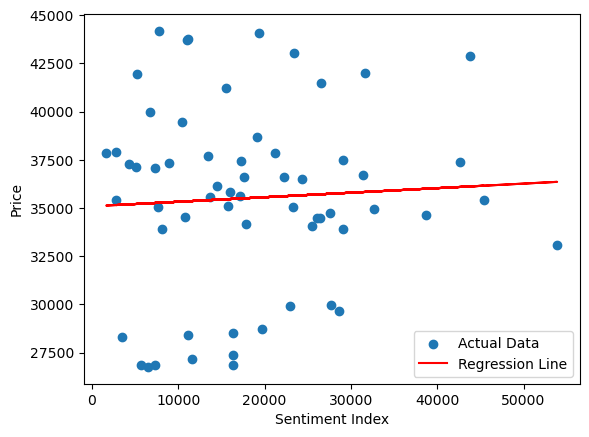

In [6]:
# Read your dataset into a pandas DataFrame
data = pd.read_csv(final_file_path)

# Define the independent (X) and dependent (y) variables
X = data['Sentiment_Index'].values.reshape(-1, 1)
y = data['Price'].values

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Visualize the data and regression line
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Sentiment Index')
plt.ylabel('Price')
plt.legend()
plt.show()

In [7]:
beta_0 = model.intercept_
beta_1 = model.coef_[0]
epsilon = y - y_pred

print(f'Intercept (beta_0): {beta_0}')
print(f'Slope (beta_1): {beta_1}')
print(f'Residuals (epsilon): {epsilon}')

Intercept (beta_0): 35088.08025253041
Slope (beta_1): 0.023546947386732704
Residuals (epsilon): [-8076.44398577 -8391.18358462 -8482.2761401  -8607.654616
 -8365.74941894 -8192.06775319 -6956.76888418 -6936.9974355
 -6839.73201512 -6828.67375701 -6079.70169715 -5707.91259089
 -5748.67088363 -3296.77869422 -1376.18940845 -1217.39826669
 -1349.39256629 -1862.05808327 -1597.27638338  -808.82831424
 -1201.32368156 -1337.8677313   -716.4238215   -921.66285052
 -1001.48920041  -371.11383348  -220.65446177  -601.83044764
   282.69615705   138.49060936   868.02300105  2022.05839726
  1930.51691932  1798.24508587   837.21427756   135.681226
  2736.20792323   725.15795171  1122.33054967   974.83427813
  1302.92771956  1706.42220777   345.24592445  1931.84910128
  2108.76036004  2705.4870653   2280.9941187   2306.91821281
  3159.63395631  4143.04889599  4729.00911848  6151.82445886
  8533.22139931  8912.12949953  8361.59949164  8436.44783469
  5785.06243613  5746.55119615  6768.82088959  7383.629